In [1]:
import json
from collections import Counter
import os

In [2]:
import yaml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir
import sys,os
import re
import math
import seaborn as sns

import matplotlib.image as mpimg

In [3]:
#i_s=6
#i_e=63

maps_folder='1_Maps_data'
subj='S02_day_three'
stimulation_file='Stimulation_seq_S02_D3.csv'


#maps_folder='1_Maps_data'
#subj='S01_day_three'
#stimulation_file='Stimulation_seq_S01_D3.csv'

In [4]:
os.getcwd()

'/Users/gurasog/Desktop/PhD/2_Invasive/2_Vladivostok/0_Maps'

In [5]:
os.chdir(os.getcwd()+'/'+maps_folder+'/'+subj)


In [6]:
import re

In [7]:

files=os.listdir()

In [8]:
os.chdir(os.getcwd()+'/../..')

In [9]:
files

['default_R053_RadioCheckSlider.yml',
 'default_R052_Rpalmar.png',
 'default_R060_Rpalmar.png',
 'default_R056_RadioCheckSlider.yml',
 'default_R061_RadioCheckSlider.yml',
 'default_R059_RadioCheckSlider.yml',
 'default_R060_imPixel.yml',
 'default_R064_RadioCheckSlider.yml',
 'default_R052_imPixel.yml',
 'default_R065_imPixel.yml',
 '.DS_Store',
 'default_R042_Rpalmar.png',
 'default_R057_imPixel.yml',
 'default_R044_RadioCheckSlider.yml',
 'default_R057_Rpalmar.png',
 'default_R041_Rdorsum.png',
 'default_R042_imPixel.yml',
 'default_R041_RadioCheckSlider.yml',
 'default_R065_Rpalmar.png',
 'default_R058_RadioCheckSlider.yml',
 'default_R060_RadioCheckSlider.yml',
 'default_R048_Rpalmar.png',
 'default_R054_Rpalmar.png',
 'default_R041_imPixel.yml',
 'default_R065_RadioCheckSlider.yml',
 'default_R041_Rpalmar.png',
 'default_R054_imPixel.yml',
 'default_R052_RadioCheckSlider.yml',
 'default_R048_imPixel.yml',
 'default_R057_RadioCheckSlider.yml',
 'default_R051_imPixel.yml',
 'defaul

In [10]:
potential_files=set([files[i][13:] for i in range(48)])
potential_files=list(potential_files)

In [11]:
trial_ids=[]
for i in range(len(files)):
    if files[i]!='.DS_Store':
        code = int(re.findall('[0-9]+', files[i])[0])
        trial_ids.append(code)

In [12]:
trials=np.sort(list(set(trial_ids)))

print('Ожидаем что количество трайлов составит:' ,len(trials))

Ожидаем что количество трайлов составит: 25


In [13]:
print('Количество файлов: ',len(files))

Количество файлов:  77


In [14]:
participants={}
all_inds=[]
for i in trials:
    
    
    if i<10:
        ind='00'+str(i)
    elif i<100:
        ind='0'+str(i)
        
    else:
        ind=str(i)
        
    try:    
        with open(maps_folder+'/'+subj+'/default_R'+ind+'_RadioCheckSlider.yml') as f:

            data = yaml.load(f, Loader=yaml.FullLoader)

            all_inds=all_inds+list(data['Sensation0'].keys())
            participants[i]=data['Sensation0']
    except:
        print(i)

In [15]:
trials

array([41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 65])

### Something

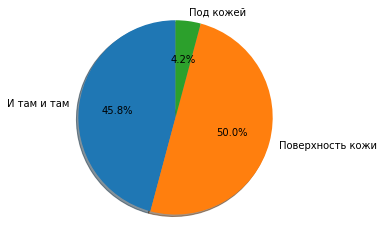

In [20]:

depth_values={}
for p in participants:
    try:
        #print()
        depth_values[p]=participants[p]['depth']
        
    except:
            nothing=2

depth_d=Counter(depth_values.values())

labels = depth_d.keys()
sizes = depth_d.values()
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


(array([4., 0., 2., 1., 4., 3., 4., 3., 1., 3.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

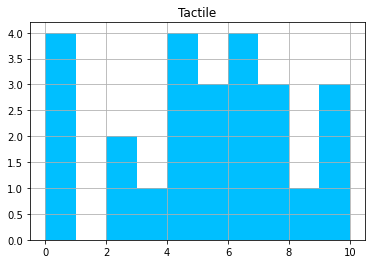

In [21]:
tactile_values={}
for p in participants:
    try:
        tactile_values[p]=participants[p]['maintactileSlider']
    except:
        nothing=2
plt.title('Tactile')
plt.grid()


plt.hist(tactile_values.values(),range=(0,10),color='deepskyblue')

(array([0., 1., 2., 6., 3., 9., 0., 0., 0., 0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

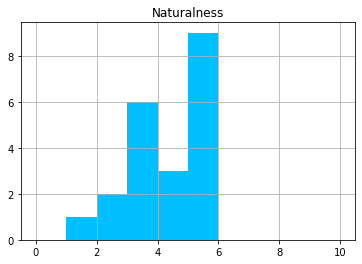

In [22]:
natural_values={}
for p in participants:
    try:
        natural_values[p]=participants[p]['naturalSlider']
    except:
        nothing=2
plt.title('Naturalness')
plt.grid()


plt.hist(natural_values.values(),range=(0,10),color='deepskyblue')

(array([15.,  0.,  0.,  1.,  2.,  1.,  1.,  2.,  1.,  2.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

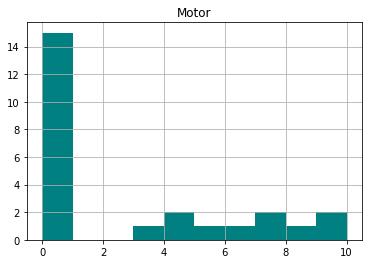

In [23]:
motor_values={}

for p in participants:
    try:
        motor_values[p]=participants[p]['motorSlider']
    except:
        nothing=2

plt.title('Motor')
plt.grid()
plt.hist(motor_values.values(),range=(0,10),color='teal')

(array([24.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

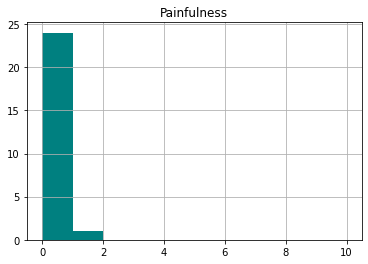

In [24]:
pain_values={}

for p in participants:
    try:
        pain_values[p]=participants[p]['painSlider']
    except:
        nothing=2

plt.title('Painfulness')
plt.grid()
plt.hist(pain_values.values(),range=(0,10),color='teal')

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

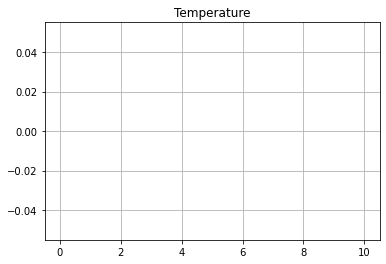

In [25]:
temp_values={}

for p in participants:
    try:
        temp_values[p]=participants[p]['tempSlider']
    except:
        nothing=2

plt.title('Temperature')
plt.grid()
plt.hist(temp_values.values(),range=(0,10),color='teal')

(array([25.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 <BarContainer object of 10 artists>)

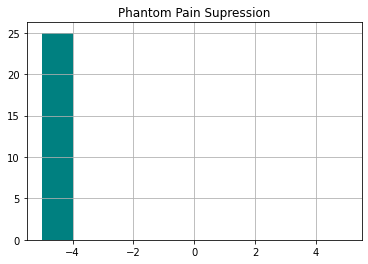

In [26]:
phantom_values={}

for p in participants:
    try:
        phantom_values[p]=participants[p]['phantomSlider']
    except:
        nothing=2

plt.title('Phantom Pain Supression')
plt.grid()
plt.hist(phantom_values.values(),range=(-5,5),color='teal')

### График для статьи

In [27]:

sliders=['maintactileSlider','naturalSlider','motorSlider','painSlider','phantomSlider']

title_ru=['Интенсивность тактильного ощущения',
         'Естественно ли было тактильное ощущение?',
         'Насколько заметным было ощущение движениние?',
         'Глубина испытанного ощущение?',
         'Насколько болезненным показалось ощущение?',
         'Как изменилась температура в данной области?',
         'Насколько интенсивна была фантомная боль?']

title_eng=['Intencity of tactile sensation',
         'Naturalness of tactile sensation',
         'Intencity of evoked movement',
         'Depth of sensation',
         'Painfulness of sensation',
         'Change in temperature',
         'Intencity of phantom limb pain']


In [36]:
a=sns.color_palette("Reds", 4,desat=1)

In [37]:
labels_ru=labels
labels_eng=['Both','Skin surface','Under skin']

In [38]:
labels

dict_keys(['И там и там', 'Поверхность кожи', 'Под кожей'])

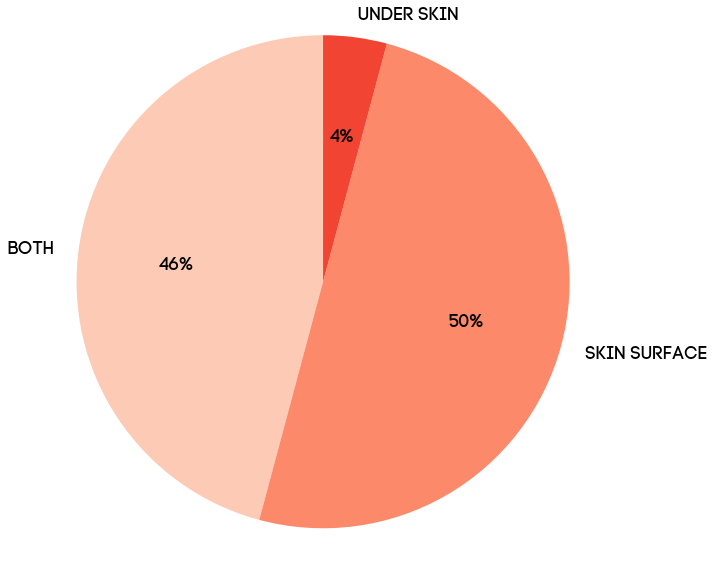

In [39]:
fig1, ax1 = plt.subplots(figsize=[10,10])
ax1.pie(sizes,  labels=labels_eng, autopct='%1.f%%', colors=a,
        startangle=90,textprops={'fontsize': 18, 'family': 'Code Pro',})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.legend(loc='upper left',textprops={'fontsize': 18, 'family': 'Code Pro',})
plt.show()

In [44]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


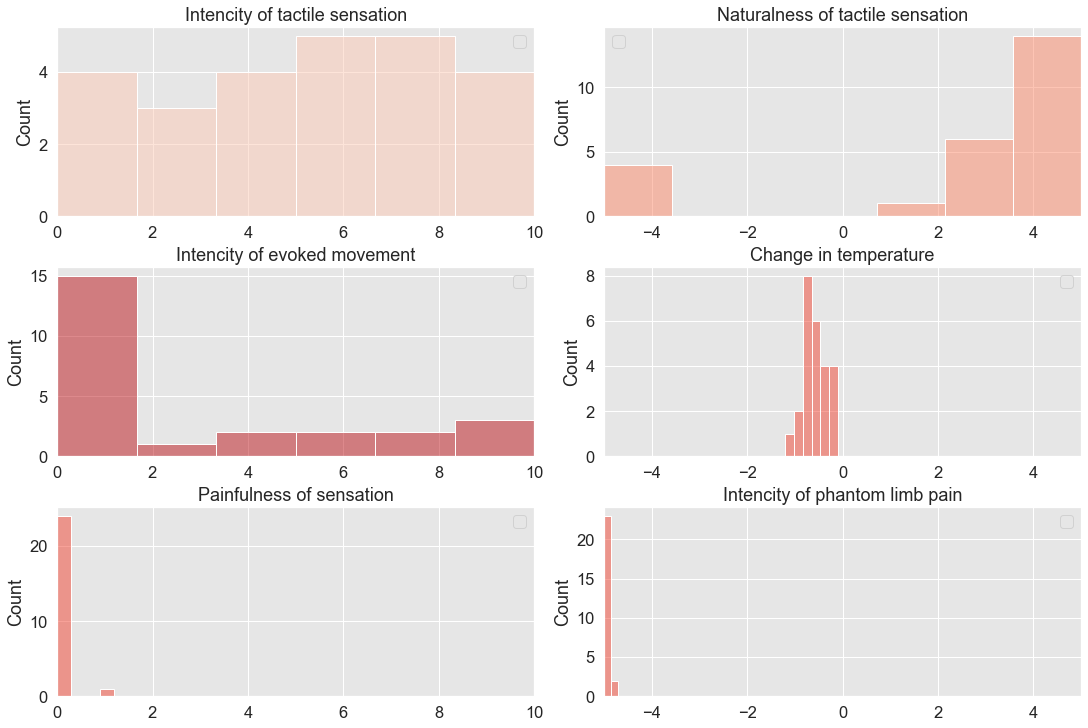

In [56]:
fig,ax =plt.subplots(3,2, figsize=(15, 10), constrained_layout = True)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
#sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
sns.set_style()

a=sns.color_palette("Reds", 4,desat=1)
[a.pop(i) for i in [3,2,1]]
sns.histplot(tactile_values.values(), palette=a,ax=ax[0,0], hue=None)
ax[0,0].set_xlim(0,10)
ax[0,0].set_title('Intencity of tactile sensation')
ax[0,0].legend()
#ax[0,0].set_xlabel('Grade')


a=sns.color_palette("Reds", 4,desat=1)
[a.pop(i) for i in [3,2,0]]
sns.histplot(natural_values.values(), palette=a,ax=ax[0,1], hue=None)
ax[0,1].set_xlim(-5,5)
ax[0,1].set_title('Naturalness of tactile sensation')
ax[0,1].legend()
#ax[0,1].set_xticklabels(['No','Yes'])


a=sns.color_palette("Reds", 4,desat=1)
[a.pop(i) for i in [2,1,0]]
sns.histplot(motor_values.values(),palette=a,ax=ax[1,0])
ax[1,0].set_xlim(0,10)
ax[1,0].set_title('Intencity of evoked movement',)
ax[1,0].legend()



a=sns.color_palette("Reds", 4,desat=1)
[a.pop(i) for i in [3,1,0]]
sns.histplot(temp_values.values(),palette=a,ax=ax[1,1])
ax[1,1].set_xlim(-5,5)
ax[1,1].set_title('Change in temperature')
ax[1,1].legend()



a=sns.color_palette("Reds", 4,desat=1)
[a.pop(i) for i in [3,1,0]]
sns.histplot(pain_values.values(),palette=a,ax=ax[2,0],bins=4)
ax[2,0].set_xlim(0,10)
ax[2,0].set_title('Painfulness of sensation',)
ax[2,0].legend()



a=sns.color_palette("Reds", 4,desat=1)
[a.pop(i) for i in [3,1,0]]
sns.histplot(phantom_values.values(),palette=a,ax=ax[2,1],bins=2)
ax[2,1].set_xlim(-5,5)
ax[2,1].set_title('Intencity of phantom limb pain',)
ax[2,1].legend()




#fig.show()

In [57]:
a

[(0.9466666666666668, 0.268235294117647, 0.196078431372549)]

### Анализ изображений

In [16]:
img_list=[]
                     
for i in trials:
    print(i)
    
    if i<10:
        ind='00'+str(i)
    elif i<100:
        ind='0'+str(i)
        
    
    for pot in potential_files:
        try:
            img = mpimg.imread(os.getcwd()+'/'+maps_folder+'/'+subj+'/default_R'+ind+'_'+pot)
            print(pot,' ok')
            if pot=='Rpalmar.png':
                img_list.append(img)
        except:
            y=0
        

41
Rdorsum.png  ok
Rpalmar.png  ok
42
Rpalmar.png  ok
43
Rpalmar.png  ok
44
Rpalmar.png  ok
45
Rpalmar.png  ok
46
Rpalmar.png  ok
47
48
Rpalmar.png  ok
49
Rpalmar.png  ok
50
Rpalmar.png  ok
51
Rpalmar.png  ok
52
Rpalmar.png  ok
53
Rpalmar.png  ok
54
Rpalmar.png  ok
55
Rpalmar.png  ok
56
Rpalmar.png  ok
57
Rpalmar.png  ok
58
Rpalmar.png  ok
59
Rpalmar.png  ok
60
Rdorsum.png  ok
Rpalmar.png  ok
61
Rdorsum.png  ok
Rpalmar.png  ok
62
Rpalmar.png  ok
63
Rpalmar.png  ok
64
Rpalmar.png  ok
65
Rpalmar.png  ok


In [25]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

Размерность  (24, 801, 860, 4)


([], [])

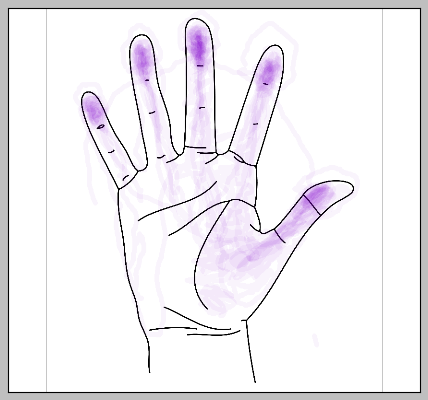

In [26]:
img_array=np.array(img_list)
print('Размерность ', str(img_array.shape))
plt.imshow(np.mean(img_array,0))

plt.grid(False)

# Hide axes ticks
plt.xticks([])
plt.yticks([])

In [27]:
img_list_flatten=[img_list[i].flatten() for i in range(len(img_list))]
from sklearn.decomposition import PCA

pca=PCA(2)
pca_fransforms=pca.fit_transform(img_list_flatten)

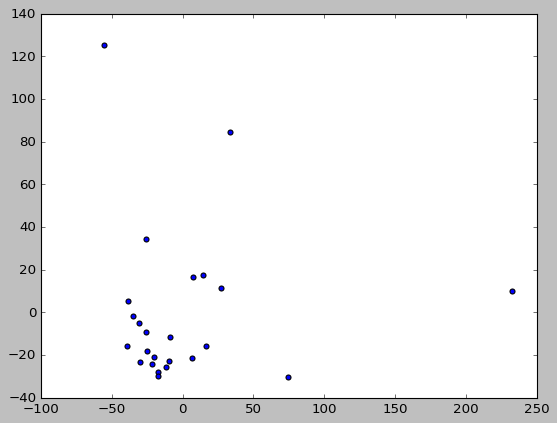

In [28]:

plt.scatter(pca_fransforms[:,0],pca_fransforms[:,1])

In [29]:
from sklearn.cluster import KMeans,SpectralClustering,AgglomerativeClustering

In [30]:
cluster_num=2

In [31]:
clusters

NameError: name 'clusters' is not defined

In [ ]:
km=AgglomerativeClustering(n_clusters=cluster_num)
clusters=km.fit_predict(pca_fransforms)

plt.scatter(pca_fransforms[:,0],pca_fransforms[:,1],c=clusters)

In [ ]:
for i in range(cluster_num):

    ind_1=np.where(clusters==i)
    plt.imshow(np.mean(img_array[ind_1],0))
    plt.show()


### Pie chart ощущений

In [17]:
participants={}
all_inds=[]

all_dicts=[]
ind_list=[]

for i in trials:
    try:
        if i<10:
            ind='00'+str(i)
        elif i<100:
            ind='0'+str(i)

        else:
            ind=str(i)
        with open(maps_folder+'/'+subj+'/default_R'+ind+'_RadioCheckSlider.yml') as f:

            data = yaml.load(f, Loader=yaml.FullLoader)

            all_inds=all_inds+list(data['Sensation0'].keys())
            participants[i]=data['Sensation0']

            all_dicts.append(data['Sensation0'])
            ind_list.append(ind)

    except:
        print(i)

In [18]:
main_df=pd.DataFrame.from_dict(all_dicts,orient='columns')
#main_df['ind']=np.arange(i_s,i_e)
main_df['ind']=ind_list
main_df.head()

,depth,maintactileSlider,motorSlider,naturalSlider,painSlider,phantomSlider,tempSlider,pressureSlider,touchSlider,urgeSlider,vibrationSlider,sharpSlider,ind
0,И там и там,0.0,0.0,-4.9,0.0,-5.0,-0.2,NaN,NaN,NaN,NaN,NaN,041
1,NaN,6.8,4.8,5.0,0.1,-4.9,-0.1,8.0,5.1,NaN,NaN,NaN,042
2,Поверхность кожи,4.1,7.2,5.0,0.0,-4.9,-0.5,NaN,4.4,3.9,NaN,NaN,043
3,Поверхность кожи,10.0,7.7,5.0,0.0,-5.0,-0.8,NaN,10.0,10.0,NaN,NaN,044
4,И там и там,6.7,0.0,5.0,0.0,-5.0,-0.8,6.5,6.8,NaN,1.5,NaN,045


In [19]:
counts=main_df.copy().drop(['maintactileSlider','naturalSlider','motorSlider','painSlider','phantomSlider','tempSlider','ind'], axis='columns').describe().loc['count']

In [20]:
counts

pressureSlider     13.0
touchSlider        17.0
urgeSlider          9.0
vibrationSlider     2.0
sharpSlider         1.0
Name: count, dtype: float64

In [21]:
colors = sns.color_palette('pastel')
#colors = sns.color_palette("Blues",15)
colors = sns.color_palette("Reds",6)

In [22]:
senses_names=list(counts.index)
senses_values=list(counts.values)
senses_colors=['hotpink','silver','maroon','red','purple','fuchsia','green','lime','olive','navy','teal','yellow'
              ,'sienna','palegreen','darkkhaki']


In [23]:
d_eng={'vibrationSlider':'Vibration',
'flutterSlider':'Flutter',
'urgeSlider':'Urge to move',
'touchSlider':'Touch',
'pressureSlider':'Pressure',
'sharpSlider':'Sharp',
'prickSlider':'Prick',
'electricSlider':'Electric',
'shockSlider':'Hit',
'pulseSlider':'Pulse',
'tickleSlider':'Tickle',
'itchSlider':'Itch',
'tingleSlider':'Tingle',
'numbSlider':'Numb',
'warmSlider':'Warm',
'coolSlider':'Cool'}

labels=np.array(list(d_eng.values()))

In [24]:
d_ru={'vibrationSlider':'Вибрация',
'flutterSlider':'Подергивание',
'urgeSlider':'Намерение произвести движение',
'touchSlider':'Прикосновение',
'pressureSlider':'Сдавливание',
'sharpSlider':'Укол',
'prickSlider':'Покалывание',
'electricSlider':'Электрический ток',
'shockSlider':'Удар',
'pulseSlider':'Пульсация',
'tickleSlider':'Щекотка',
'itchSlider':'Зуд',
'tingleSlider':'Пощипывание',
'numbSlider':'Онемение',
'warmSlider':'Тепло',
'coolSlider':'Холод'}

NameError: name 'sliders' is not defined

In [28]:
sliders=['vibrationSlider',
'flutterSlider',
'urgeSlider',
'touchSlider',
'pressureSlider',
'sharpSlider',
'prickSlider',
'electricSlider',
'shockSlider',
'pulseSlider',
'tickleSlider',
'itchSlider',
'tingleSlider',
'numbSlider',
'warmSlider',
'coolSlider']

sliders=np.array(sliders)

In [29]:
temp_senses_values=[]
for i in range(len(sliders)):
    try: temp_senses_values.append(counts[sliders[i]])
    except: temp_senses_values.append(0)
temp_senses_values=np.array(temp_senses_values)

In [30]:
inds=np.where(temp_senses_values!=0)[0]

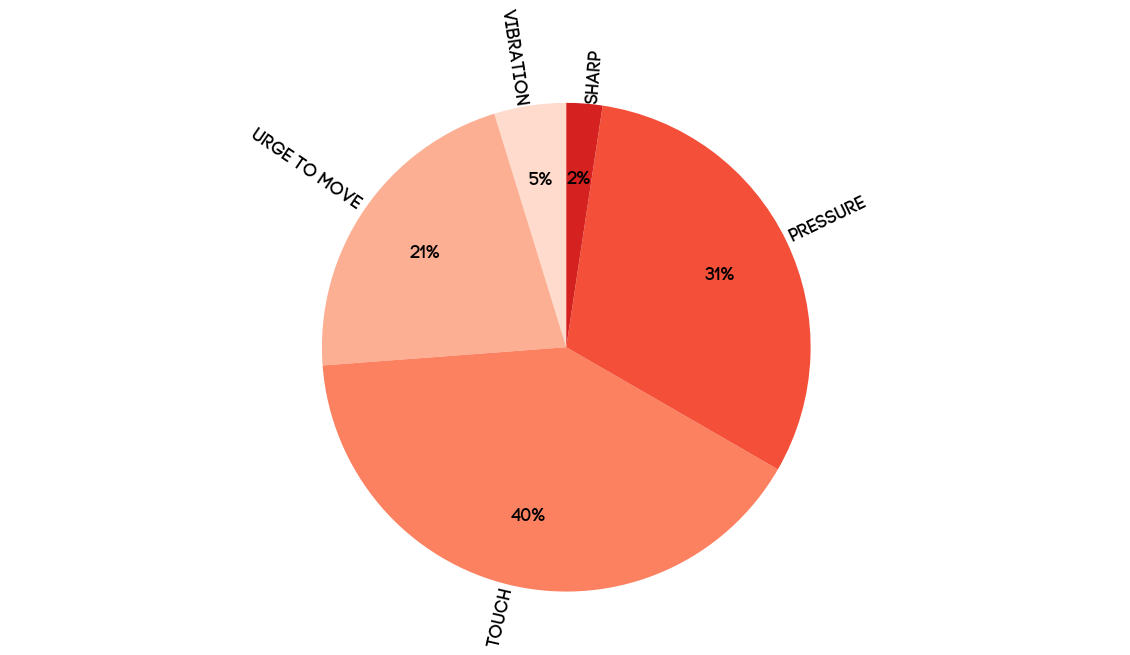

In [31]:

#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=[20,10])
ax1.pie(temp_senses_values[inds],  labels=labels[inds], autopct='%1.f%%', colors=colors, labeldistance=1.0,    pctdistance=0.7, rotatelabels=True,
        startangle=90,textprops={'fontsize': 18, 'family': 'Code Pro',})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.legend(loc='upper left',textprops={'fontsize': 18, 'family': 'Code Pro',})
plt.show()


### Характеристики стимуляции

In [32]:
stimulation_df=pd.read_csv(maps_folder+'/'+stimulation_file,sep='\t')


In [33]:
stimulation_df_clean=stimulation_df[stimulation_df['Image']!='без картинки'][stimulation_df['Image']!='нет']
len(stimulation_df_clean)

/var/folders/2m/6g8qzjcd00n9j42dqh2ndj780000gn/T/ipykernel_5639/1986649311.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stimulation_df_clean=stimulation_df[stimulation_df['Image']!='без картинки'][stimulation_df['Image']!='нет']


25

In [34]:
participants={}
all_inds=[]
for i in trials:
    
    
    if i<10:
        ind='00'+str(i)
    elif i<100:
        ind='0'+str(i)
        
    else:
        ind=str(i)
        
    try:    
        with open(maps_folder+'/'+subj+'/default_R'+ind+'_RadioCheckSlider.yml') as f:

            data = yaml.load(f, Loader=yaml.FullLoader)

            all_inds=all_inds+list(data['Sensation0'].keys())
            participants[i]=data['Sensation0']
    except:
        print(i)

In [35]:
main_df=pd.DataFrame.from_dict(all_dicts,orient='columns')
#main_df['ind']=np.arange(i_s,i_e)
main_df.index=ind_list


In [36]:
senses_df=main_df.copy().drop(['depth'],axis=1)


In [37]:
senses_df['pulse_width']=stimulation_df_clean['Pulse_width']
senses_df['frequency']=stimulation_df_clean['Frequency']
stimulation_df_clean['Pulse_width'].values.astype('str') 

array(['240', '240', '60', '480', '960', '60', '480', '120', '960', '240',
       '480', '120', '240', '120', '960', '60', '960', '480', '480',
       '240', '60', '60', '120', '120', '60'], dtype='<U21')

In [38]:
senses_df['pulse_width']=np.sqrt(stimulation_df_clean['Pulse_width'].values)**2
senses_df['frequency']=np.sqrt(stimulation_df_clean['Frequency'].values)**2

In [39]:
senses_df

,maintactileSlider,motorSlider,naturalSlider,painSlider,phantomSlider,tempSlider,pressureSlider,touchSlider,urgeSlider,vibrationSlider,sharpSlider,pulse_width,frequency
041,0.0,0.0,-4.9,0.0,-5.0,-0.2,NaN,NaN,NaN,NaN,NaN,240.0,20.0
042,6.8,4.8,5.0,0.1,-4.9,-0.1,8.0,5.1,NaN,NaN,NaN,240.0,10.0
043,4.1,7.2,5.0,0.0,-4.9,-0.5,NaN,4.4,3.9,NaN,NaN,60.0,60.0
044,10.0,7.7,5.0,0.0,-5.0,-0.8,NaN,10.0,10.0,NaN,NaN,480.0,10.0
045,6.7,0.0,5.0,0.0,-5.0,-0.8,6.5,6.8,NaN,1.5,NaN,960.0,5.0
046,4.9,6.4,1.9,0.2,-4.9,-0.3,NaN,6.0,5.4,NaN,NaN,60.0,60.0
047,0.0,3.1,-4.8,0.0,-5.0,-0.7,NaN,NaN,1.9,NaN,NaN,480.0,60.0
048,6.6,0.0,3.8,0.1,-5.0,-0.1,2.1,4.7,NaN,NaN,NaN,120.0,60.0
049,0.2,0.0,-5.0,0.0,-5.0,-0.6,10.0,NaN,NaN,4.4,NaN,960.0,200.0
050,7.0,0.0,3.3,1.2,-5.0,-1.2,8.6,2.1,NaN,NaN,NaN,240.0,60.0


In [40]:
freqs_sq=np.sort(list(set(senses_df['frequency'])))
freqs_labels=np.sort(list(set(stimulation_df_clean['Frequency'])))

pulse_sq=np.sort(list(set(senses_df['pulse_width'])))
pulse_labels=np.sort(list(set(stimulation_df_clean['Pulse_width'])))

In [41]:
import matplotlib

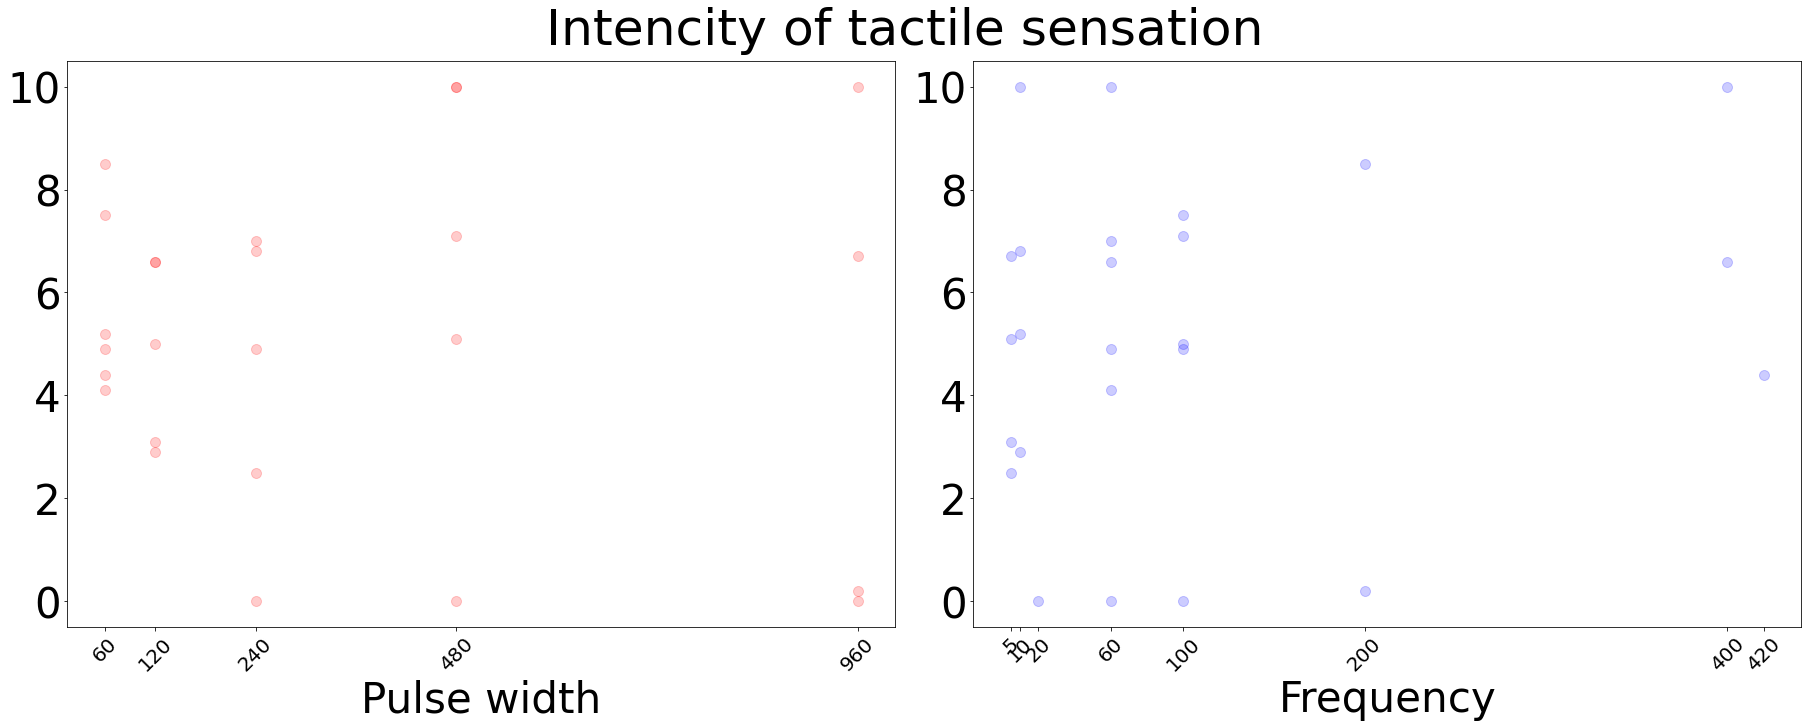

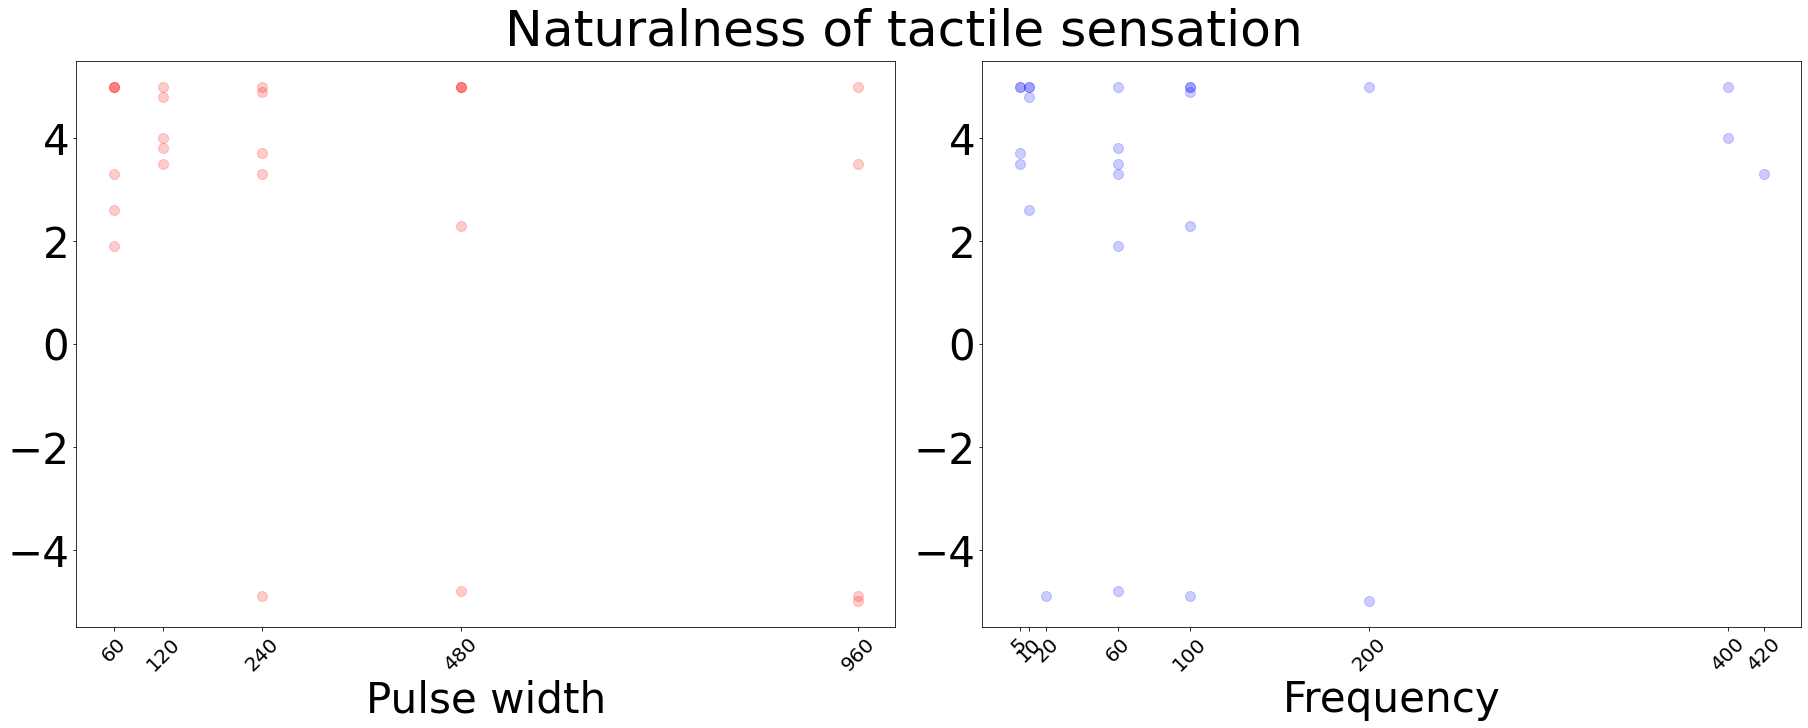

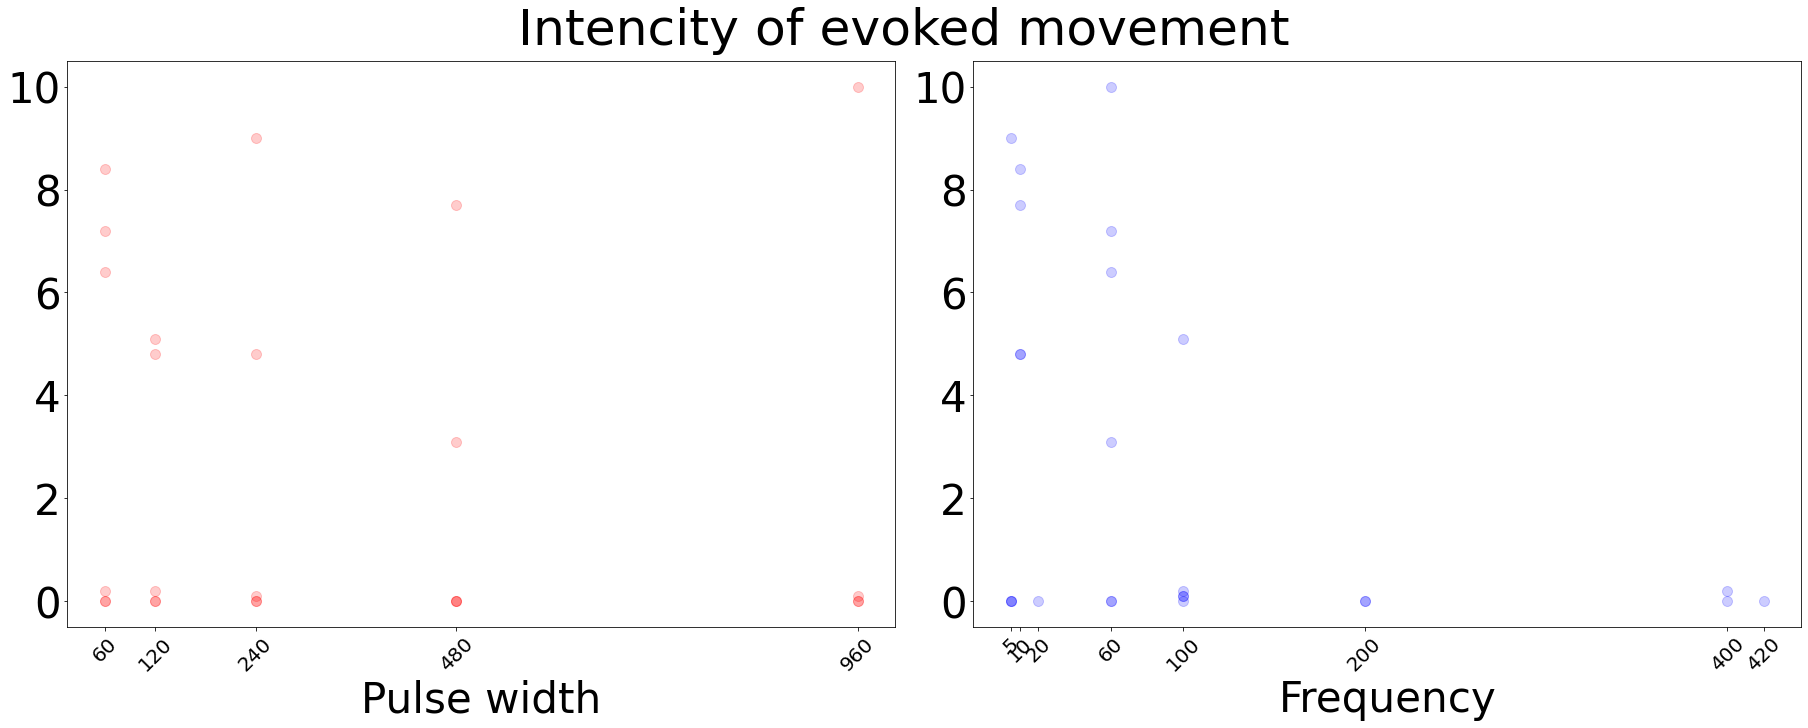

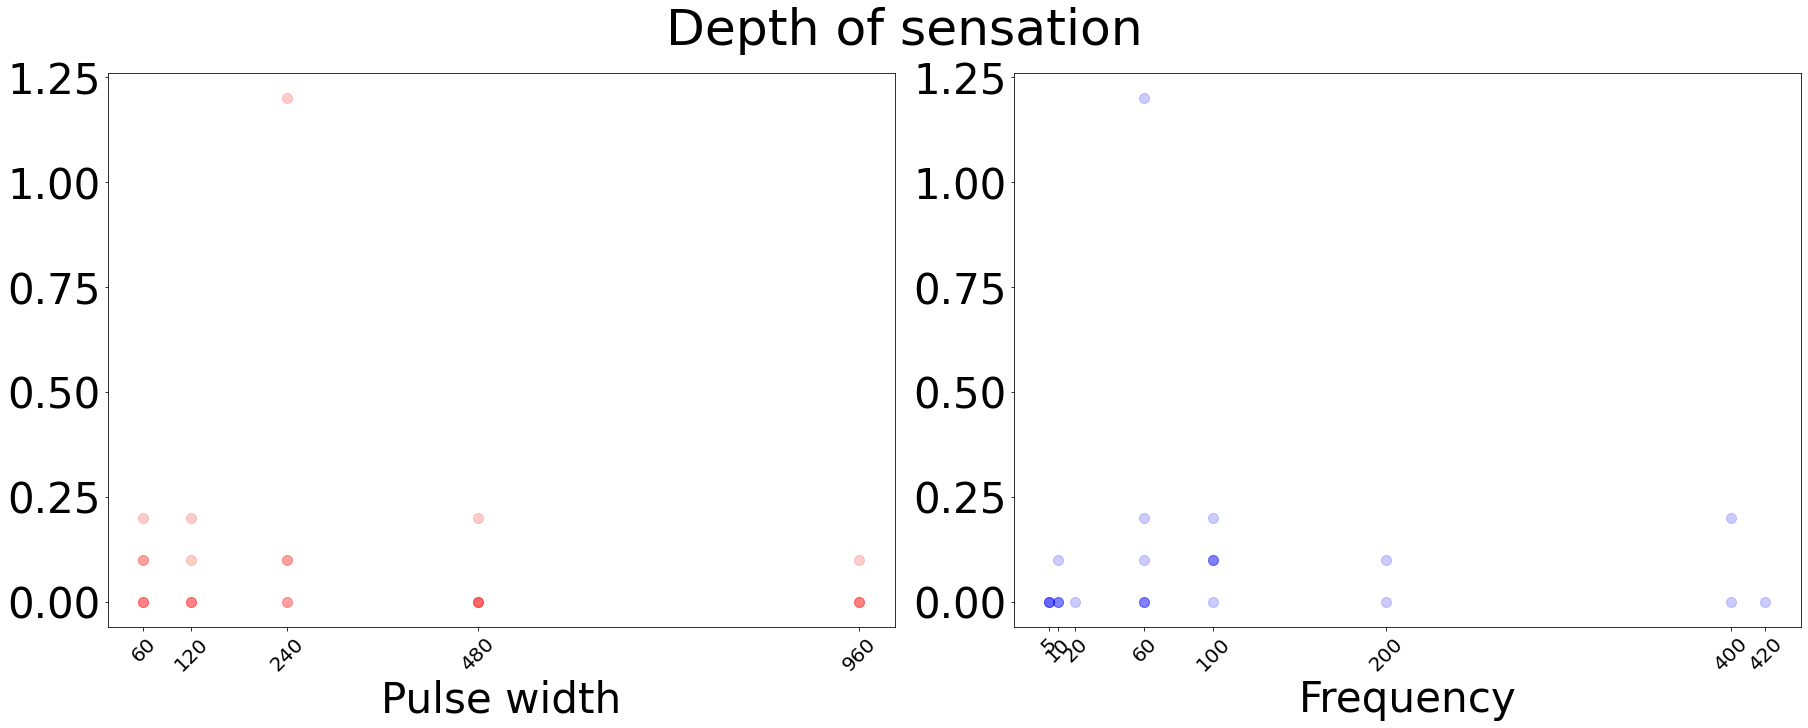

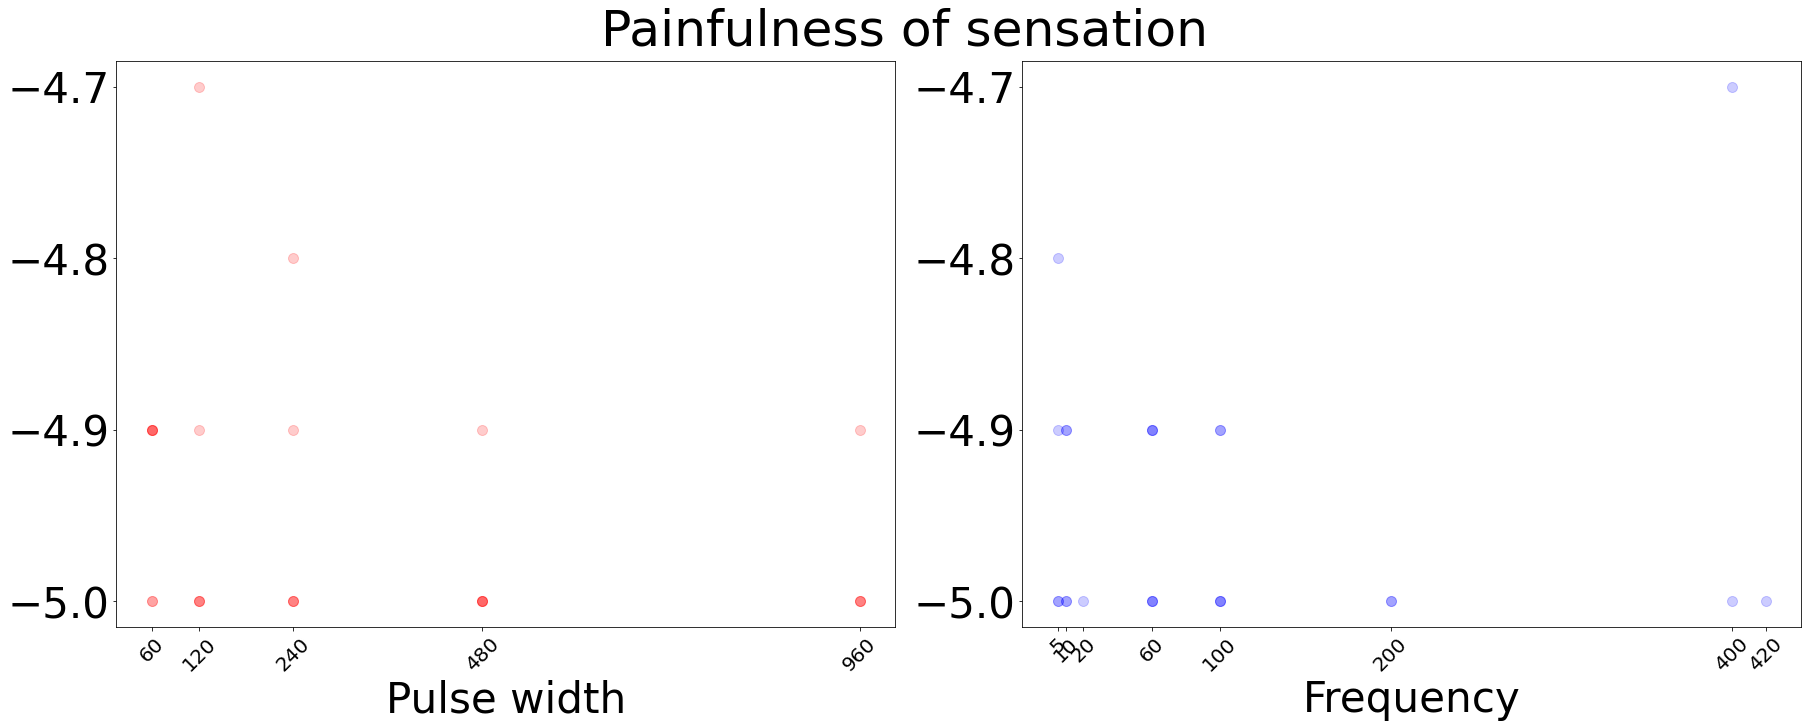

In [42]:
#plt.plot(senses_df['maintactileSlider'].values,senses_df['pulse_width'].values,'o',alpha=0.2)
matplotlib.rcParams.update({'font.size': 42})
sliders=['maintactileSlider','naturalSlider','motorSlider','painSlider','phantomSlider']

title_ru=['Интенсивность тактильного ощущения',
         'Естественно ли было тактильное ощущение?',
         'Насколько заметным было ощущение движениние?',
         'Глубина испытанного ощущение?',
         'Насколько болезненным показалось ощущение?',
         'Как изменилась температура в данной области?',
         'Насколько интенсивна была фантомная боль?']

title_eng=['Intencity of tactile sensation',
         'Naturalness of tactile sensation',
         'Intencity of evoked movement',
         'Depth of sensation',
         'Painfulness of sensation',
         'Change in temperature',
         'Intencity of phantom limb pain']

for i in range(len(sliders)):
    
    fig,ax=plt.subplots(1,2,figsize=(25,10),constrained_layout = True)
    #fig.tight_layout()
    fig.suptitle(title_eng[i],fontdict={'fontsize':60})
    
    word=sliders[i]
    #ax[0].set_title(word)
    ax[0].plot(senses_df['pulse_width'].values,senses_df[word].values,'ro',alpha=0.2,markersize=10)
    ax[0].set_xlabel('Pulse width')
    ax[0].set_xticks(pulse_labels)
    ax[0].set_xticklabels(pulse_labels,rotation=45,fontdict={'fontsize':20})
    
    ax[1].plot(senses_df['frequency'].values,senses_df[word].values,'bo',alpha=0.2,markersize=10)
    ax[1].set_xlabel('Frequency')
    ax[1].set_xticks(freqs_labels)
    ax[1].set_xticklabels(freqs_labels.astype(str),rotation=45,fontdict={'fontsize':20})

    plt.show()

### Связывание ощущения и стимула

In [43]:
senses_df=main_df.copy().drop(['motorSlider','naturalSlider','painSlider','maintactileSlider','phantomSlider','depth'],axis=1)

#senses_df=main_df.copy().drop(['depth'],axis=1)

In [44]:
senses_df['pulse_width']=stimulation_df_clean['Pulse_width']
senses_df['frequency']=stimulation_df_clean['Frequency']


In [46]:
stimulation_df_clean['Pulse_width'].values.astype('str') 

array(['240', '240', '60', '480', '960', '60', '480', '120', '960', '240',
       '480', '120', '240', '120', '960', '60', '960', '480', '480',
       '240', '60', '60', '120', '120', '60'], dtype='<U21')

In [131]:
stimulation_df_clean['Pulse_width'].values.astype('str')

array(['240', '240', '60', '480', '960', '60', '480', '120', '960', '240',
       '480', '120', '240', '120', '960', '60', '960', '480', '480',
       '240', '60', '60', '120', '120', '60'], dtype='<U21')

In [47]:
main_df_t=senses_df.apply(lambda x: [0 if math.isnan(x[i]) else 1 for i in range(len(x))])

In [48]:
main_df_t['pulse_width']=stimulation_df_clean['Pulse_width']

In [49]:
main_df_t['pulse_width']=stimulation_df_clean['Pulse_width']

In [51]:
main_df_t['pulse_width']=np.sqrt(stimulation_df_clean['Pulse_width'].values)**2
main_df_t['frequency']=np.sqrt(stimulation_df_clean['Frequency'].values)**2

In [136]:
sns.swarmplot?

/Users/gurasog/anaconda3/envs/invasive/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurasog/anaconda3/envs/invasive/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurasog/anaconda3/envs/invasive/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

IndexError: index 8 is out of bounds for axis 0 with size 8

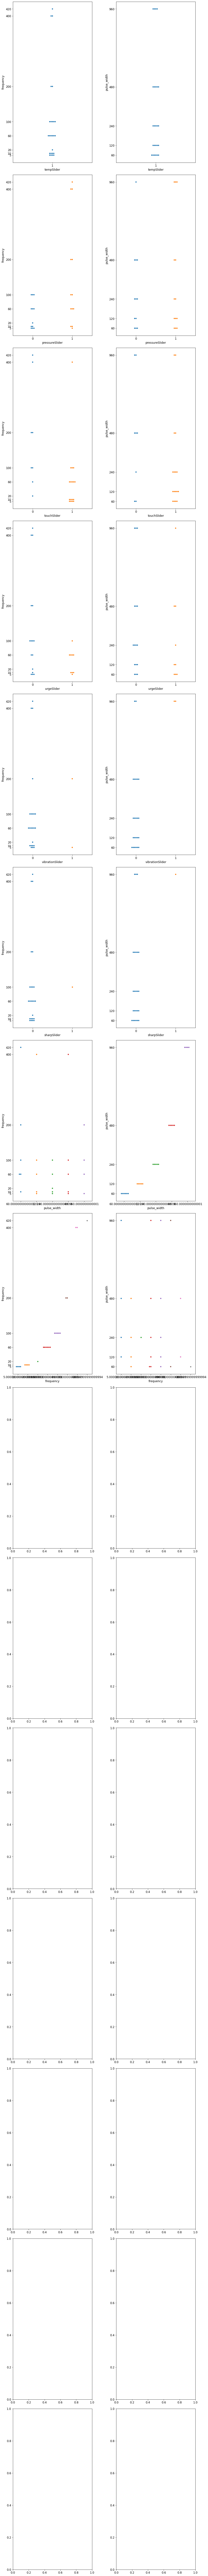

In [53]:
matplotlib.rcParams.update({'font.size': 12})
fig,axs=plt.subplots(15,2, figsize=(12,150),constrained_layout = True)

for i in range(11):
    #sns.swarmplot(main_df_t[main_df_t.columns[i]],main_df['duration'],ax=axs[0,i])
    sns.swarmplot(main_df_t[main_df_t.columns[i]],main_df_t['frequency'],ax=axs[i,0])
    axs[i,0].set_yticks(freqs_labels)
    axs[i,0].set_yticklabels(freqs_labels)
    
    sns.swarmplot(main_df_t[main_df_t.columns[i]],main_df_t['pulse_width'],ax=axs[i,1])
    axs[i,1].set_yticks(pulse_labels)
    axs[i,1].set_yticklabels(pulse_labels)
    

#axs[0,1]=sns.swarmplot(loool,main_df['depth'])
#axs[0,1]=sns.swarmplot(loool,main_df['frequenc'])
#axs.show()

In [211]:
main_df_t[['pulse_width','frequency','touchSlider']].

,pulse_width,frequency,touchSlider
067,15.491933,4.472136,1
068,15.491933,3.162278,0
069,7.745967,7.745967,0
070,21.908902,3.162278,0
071,30.983867,2.236068,0
072,7.745967,4.472136,0
073,21.908902,7.745967,0
074,21.908902,14.832397,0
075,30.983867,14.142136,1
076,15.491933,2.236068,0


In [207]:
main_df_t[main_df_t['touchSlider','pulse_width']]

KeyError: ('touchSlider', 'pulse_width')